## 과대적합 (Overfitting)
머신러닝 모델이 학습 데이터에만 과도하게 적합되어, 실제 데이터에 대한 예측 성능이 떨어지는 현상

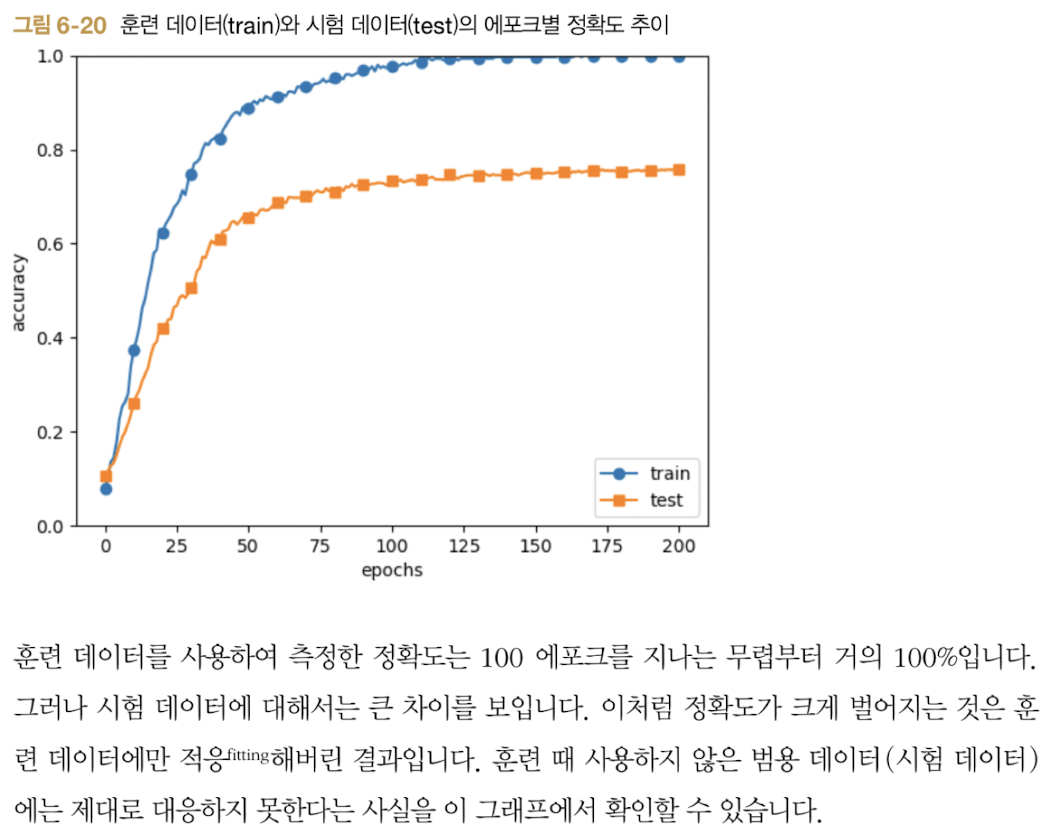

## 가중치 감소 (Weight Decay)

epoch:0, train acc:0.12, test acc:0.0845
epoch:1, train acc:0.12333333333333334, test acc:0.0997
epoch:2, train acc:0.14666666666666667, test acc:0.1137
epoch:3, train acc:0.16333333333333333, test acc:0.1303
epoch:4, train acc:0.2, test acc:0.1459
epoch:5, train acc:0.23, test acc:0.1655
epoch:6, train acc:0.24, test acc:0.1676
epoch:7, train acc:0.24666666666666667, test acc:0.1755
epoch:8, train acc:0.27666666666666667, test acc:0.1866
epoch:9, train acc:0.29333333333333333, test acc:0.2037
epoch:10, train acc:0.31666666666666665, test acc:0.2225
epoch:11, train acc:0.32, test acc:0.2192
epoch:12, train acc:0.3433333333333333, test acc:0.2293
epoch:13, train acc:0.36, test acc:0.2435
epoch:14, train acc:0.37333333333333335, test acc:0.2533
epoch:15, train acc:0.38666666666666666, test acc:0.2642
epoch:16, train acc:0.3933333333333333, test acc:0.2891
epoch:17, train acc:0.4033333333333333, test acc:0.289
epoch:18, train acc:0.4066666666666667, test acc:0.2998
epoch:19, train acc:0.4

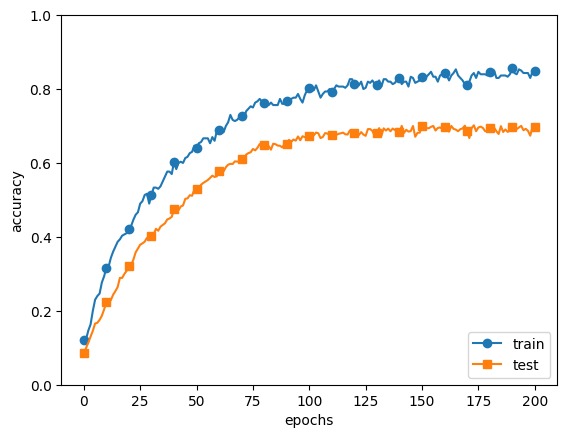

In [1]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =======================
# weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(
    input_size=784,
    hidden_size_list=[100, 100, 100, 100, 100, 100],
    output_size=10,
    weight_decay_lambda=weight_decay_lambda,
)
optimizer = SGD(lr=0.01)  # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print(
            "epoch:"
            + str(epoch_cnt)
            + ", train acc:"
            + str(train_acc)
            + ", test acc:"
            + str(test_acc)
        )

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {"train": "o", "test": "s"}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker="o", label="train", markevery=10)
plt.plot(x, test_acc_list, marker="s", label="test", markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc="lower right")
plt.show()

## 드롭아웃 (Dropout)

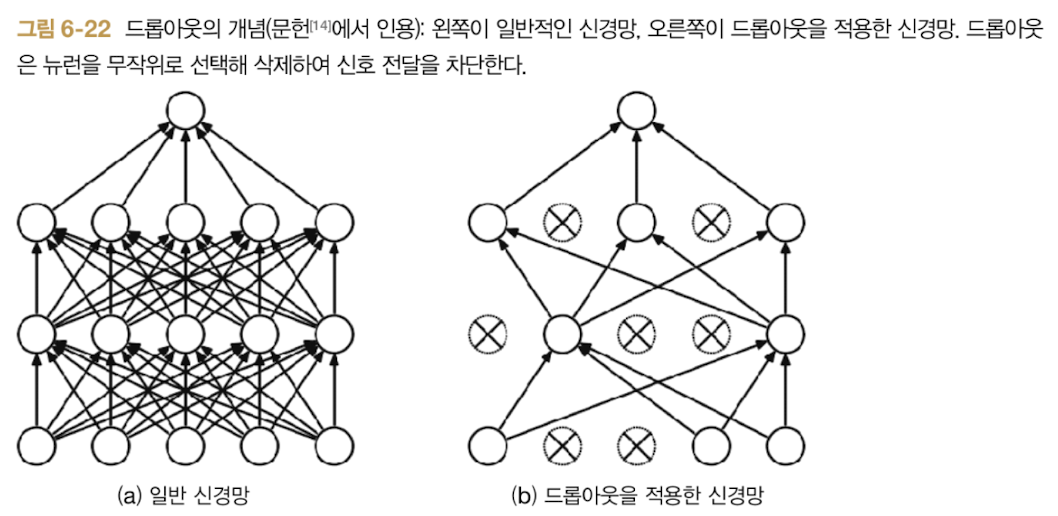

train loss:2.3274921316955233
=== epoch:1, train acc:0.10333333333333333, test acc:0.0948 ===
train loss:2.2985049584934196
train loss:2.3115911549496455
train loss:2.314311187561744
=== epoch:2, train acc:0.10333333333333333, test acc:0.0959 ===
train loss:2.312455549517186
train loss:2.2897597570484165
train loss:2.2921707488864156
=== epoch:3, train acc:0.11, test acc:0.0967 ===
train loss:2.305216308203809
train loss:2.292223537520574
train loss:2.3023615647852433
=== epoch:4, train acc:0.11, test acc:0.0986 ===
train loss:2.2984767173904093
train loss:2.3102064572231304
train loss:2.282044500814964
=== epoch:5, train acc:0.11333333333333333, test acc:0.101 ===
train loss:2.28325470901847
train loss:2.27605851653889
train loss:2.2661948696384324
=== epoch:6, train acc:0.11666666666666667, test acc:0.1017 ===
train loss:2.282907861105002
train loss:2.2779780483538428
train loss:2.3134713370636115
=== epoch:7, train acc:0.11666666666666667, test acc:0.1043 ===
train loss:2.2833106270

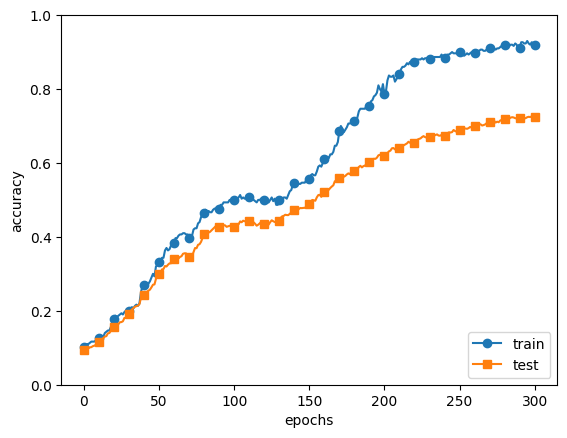

In [10]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 유무와 비울 설정 ========================
use_dropout = True  # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.15
# ====================================================

network = MultiLayerNetExtend(
    input_size=784,
    hidden_size_list=[100, 100, 100, 100, 100, 100],
    output_size=10,
    use_dropout=use_dropout,
    dropout_ration=dropout_ratio,
)
trainer = Trainer(
    network,
    x_train,
    t_train,
    x_test,
    t_test,
    epochs=301,
    mini_batch_size=100,
    optimizer="sgd",
    optimizer_param={"lr": 0.01},
    verbose=True,
)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 그래프 그리기==========
markers = {"train": "o", "test": "s"}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker="o", label="train", markevery=10)
plt.plot(x, test_acc_list, marker="s", label="test", markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc="lower right")
plt.show()